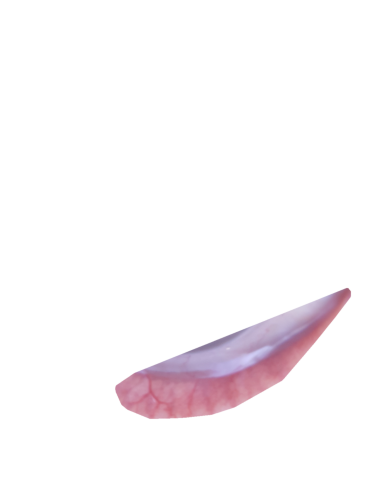

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the image
image_path = r"D:\datasets\WhatsApp Image 2025-02-17 at 4.30.37 PM.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to LAB and extract a* channel
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
a_channel = lab[:, :, 1]

# Threshold and blur
_, binary_mask = cv2.threshold(a_channel, 156, 255, cv2.THRESH_BINARY)
binary_mask = cv2.GaussianBlur(binary_mask, (5, 5), 0)

# Morphological cleaning
kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
clean_mask = cv2.morphologyEx(clean_mask, cv2.MORPH_CLOSE, kernel)

# Focus on lower half
height, width = clean_mask.shape
lower_half_mask = np.zeros_like(clean_mask)
lower_half_mask[int(height * 0.5):, :] = 255
focused_mask = cv2.bitwise_and(clean_mask, lower_half_mask)

# Extract largest contour
contours, _ = cv2.findContours(focused_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    refined_mask = np.zeros_like(focused_mask)
    cv2.drawContours(refined_mask, [cv2.convexHull(largest_contour)], -1, 255, thickness=cv2.FILLED)
else:
    refined_mask = focused_mask

# Prepare white background with only segmented conjunctiva
segmented_conjunctiva = cv2.bitwise_and(image, image, mask=refined_mask)
white_background = np.full_like(image, 255)
segmented_on_white = np.where(refined_mask[:, :, np.newaxis] == 255, segmented_conjunctiva, white_background)

# Plot only the result
plt.figure(figsize=(6, 6))
plt.imshow(segmented_on_white)
plt.axis("off")
plt.show()
